# Generators and Random Numbers
Supplementary week 4 lesson workbook, available on Github from the powderflask/cap-comp215 repository.

As usual, the first code block just imports the modules we will use.

In [46]:
import random
import matplotlib.pyplot as plt
from dataclasses import dataclass
from pprint import pprint

## Examples: generator expressions
Refer to `foundations/generators` notebook for a detailed tutorial on this topic.

In [47]:
neighbours = ((i-1, i, i+1) for i in range(1, 10))
print(neighbours)
# we can pull one item at a time out of a generator using the built-in next() function
print(next(neighbours))
print(next(neighbours))
# we can turn a generator into a list to examine the rest of its elements (though this somewhat defeats the purpose!)
print(list(neighbours))
# Notice: once the "stream" has flowed past, it is empty - there is no way to "replenish" it.
print(list(neighbours))

<generator object <genexpr> at 0x177de2510>
(0, 1, 2)
(1, 2, 3)
[(2, 3, 4), (3, 4, 5), (4, 5, 6), (5, 6, 7), (6, 7, 8), (7, 8, 9), (8, 9, 10)]
[]


To see what's going on, we can re-write the "generator expression" as a "generator function"...

In [48]:
# in-class example

## Pseudo-Random Numbers
Refer to `foundations/pseudo-random generators` notebook for a detailed tutorial on this topic.


In [49]:
# A list of n random numbers - again we are turning a "generator" in to a list
n = 10
[random.random() for i in range(n)]

[0.22924575794774793,
 0.13567871587669111,
 0.9742817030495066,
 0.9784727723984991,
 0.4466470083202728,
 0.9999141885212867,
 0.389659813728906,
 0.2591232466953878,
 0.5959458592011668,
 0.987965335376452]

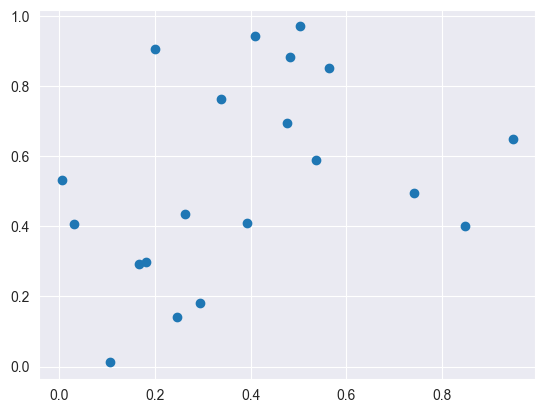

In [50]:
# Scatter plot of random (x,y) coordinates
n = 20
plt.scatter([random.random() for i in range(n)], [random.random() for i in range(n)])
plt.show()

## Chaotic Feedback

 * some mathematical functions produce chaotic patterns when you feed their output back in as the next input.

In [51]:
import time

@dataclass
class TwoDigitRand:
    """ demonstrates 'chaotic feedback' algorithm - not crypographic quality randomness!! """
    seed:int = int(time.time()*10**3)  # clock time in milli-seconds
    a:int = 7
    
    def __post_init__(self):
        self.seed = self.seed % 100  # allow 2 digit number seeds only!
        self.seed = self.rand() # move to first value in sequence
        
    def rand(self):
        """ chaotic feedback algorithm - the last output is used as input to compute the next one """
        self.seed = self.seed//10 + self.a*(self.seed%10)
        return self.seed


r = TwoDigitRand()
[r.rand() for i in range(20)]

[34, 31, 10, 1, 7, 49, 67, 55, 40, 4, 28, 58, 61, 13, 22, 16, 43, 25, 37, 52]

Sequence seed: 52


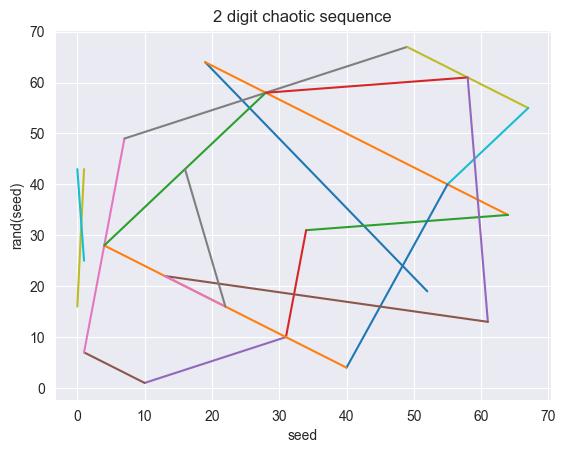

In [52]:
# Scatter plot of (seed, rand(seed))
print("Sequence seed:", r.seed)
pairs = [(r.seed, r.rand()) for i in range(n)]

segments = list(zip(pairs, pairs[1:])) # line segments connecting adjacent (seed, rand()) pairs
plt.plot(*segments)
plt.gca().set(
    title='2 digit chaotic sequence',
    xlabel='seed',
    ylabel='rand(seed)'
)
plt.show()

## Example: computational experiment with random numbers

We'll use the Histogram class developed last week to count the outcomes of the experiment

In [53]:
class Histogram:
    """ A simple histogram with a nice API """
    def __init__(self, title, xlabel='Categories', ylabel='Count'):
        _, ax = plt.subplots()
        ax.set(
            title=title,
            xlabel=xlabel,
            ylabel=ylabel,
        )
        self.ax = ax
        self.counts = {}

    def count(self, category):
        self.counts[category] = self.counts.get(category, 0) + 1

    def plot(self):
        self.ax.bar(self.counts.keys(), self.counts.values())
        plt.show()

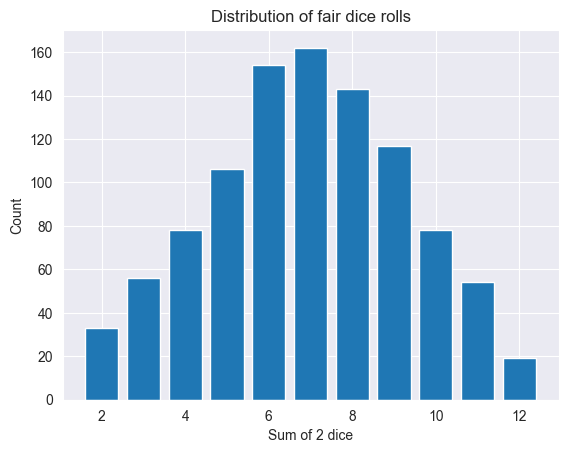

In [54]:
# Experiment: Roll some dice
def roll_dice(sides=6):
    return (random.randint(1,sides), random.randint(1,sides))

# number rolls to use in this experiment
n_rolls = 1000

rolls = Histogram("Distribution of fair dice rolls", xlabel='Sum of 2 dice')
for i in range(n_rolls):
    rolls.count(sum(roll_dice()))

rolls.plot()